In [10]:
import pandas as pd
import numpy as np

from nltk import word_tokenize
from gensim.models import word2vec

In [99]:
corpus = [' sky blue beautiful', ' love sky blue beautiful',
         ' breakfast  spicy', ' breakfast eggs very tasty',
         ' dog  quick fast', ' dog is beautiful',
         ' egg breakfast healthy']

In [100]:
labels = ['weather','weather','food','food','animal','animal','food']

In [101]:
data = pd.DataFrame({'corpus': corpus, 'lables':labels})

In [102]:
tokenised_corpus = [word_tokenize(document) for document in data['corpus']]


In [103]:
tokenised_corpus

[['sky', 'blue', 'beautiful'],
 ['love', 'sky', 'blue', 'beautiful'],
 ['breakfast', 'spicy'],
 ['breakfast', 'eggs', 'very', 'tasty'],
 ['dog', 'quick', 'fast'],
 ['dog', 'is', 'beautiful'],
 ['egg', 'breakfast', 'healthy']]

In [104]:
w2vec = word2vec.Word2Vec(tokenised_corpus, min_count = 1)

In [105]:
vocab = w2vec.wv.key_to_index.keys()

In [118]:
vocab

dict_keys(['breakfast', 'beautiful', 'dog', 'blue', 'sky', 'healthy', 'egg', 'is', 'fast', 'quick', 'tasty', 'very', 'eggs', 'spicy', 'love'])

In [107]:
# for word in vocab:
#     print(w2vec.wv.get_index(word))


In [117]:
#len(w2vec.wv['biryani'])

In [116]:
#w2vec.wv.most_similar('biryani')

In [123]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [127]:
tsne = TSNE(n_components=2, n_iter=5000)

In [128]:
words = w2vec.wv.index_to_key
wvecs = w2vec.wv[words]

In [129]:
T = tsne.fit_transform(wvecs)

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


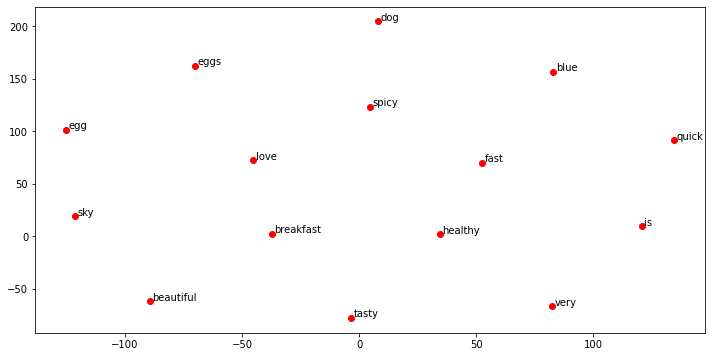

In [130]:
plt.figure(figsize = (12,6))
plt.scatter(T[:,0],T[:,1], c = 'red')
for label,x,y in zip(words, T[:,0],T[:,1]):
    plt.annotate(label, xy = (x+1, y+1))